# Proyecto para pasar los datasets de imdb a una base de datos de SQL

In [1]:
from dask.distributed import Client

client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 23.93 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49800,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 23.93 GiB
Comm: tcp://127.0.0.1:49821,Total threads: 3
Dashboard: http://127.0.0.1:49827/status,Memory: 5.98 GiB
Nanny: tcp://127.0.0.1:49803,


In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
import dask

In [3]:
dask.config.set({'dataframe.query-planning-warning': False})

In [4]:
import dask.dataframe as dd
column_types ={
    'tconst':'str',
    'titleType':'str',
    'primaryTitle':'str',
    'runtimeMinutes': 'str',
    'startYear':'str',
    'isAdult':'str',
}

ddf=dd.read_csv("basics.tsv",delimiter='\t',usecols=['tconst','titleType','primaryTitle','isAdult','startYear','runtimeMinutes','genres'],dtype=column_types)

ddf=ddf.astype(column_types)
ddf

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
npartitions=14,,,,,,,
,string,string,string,string,string,string,string
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


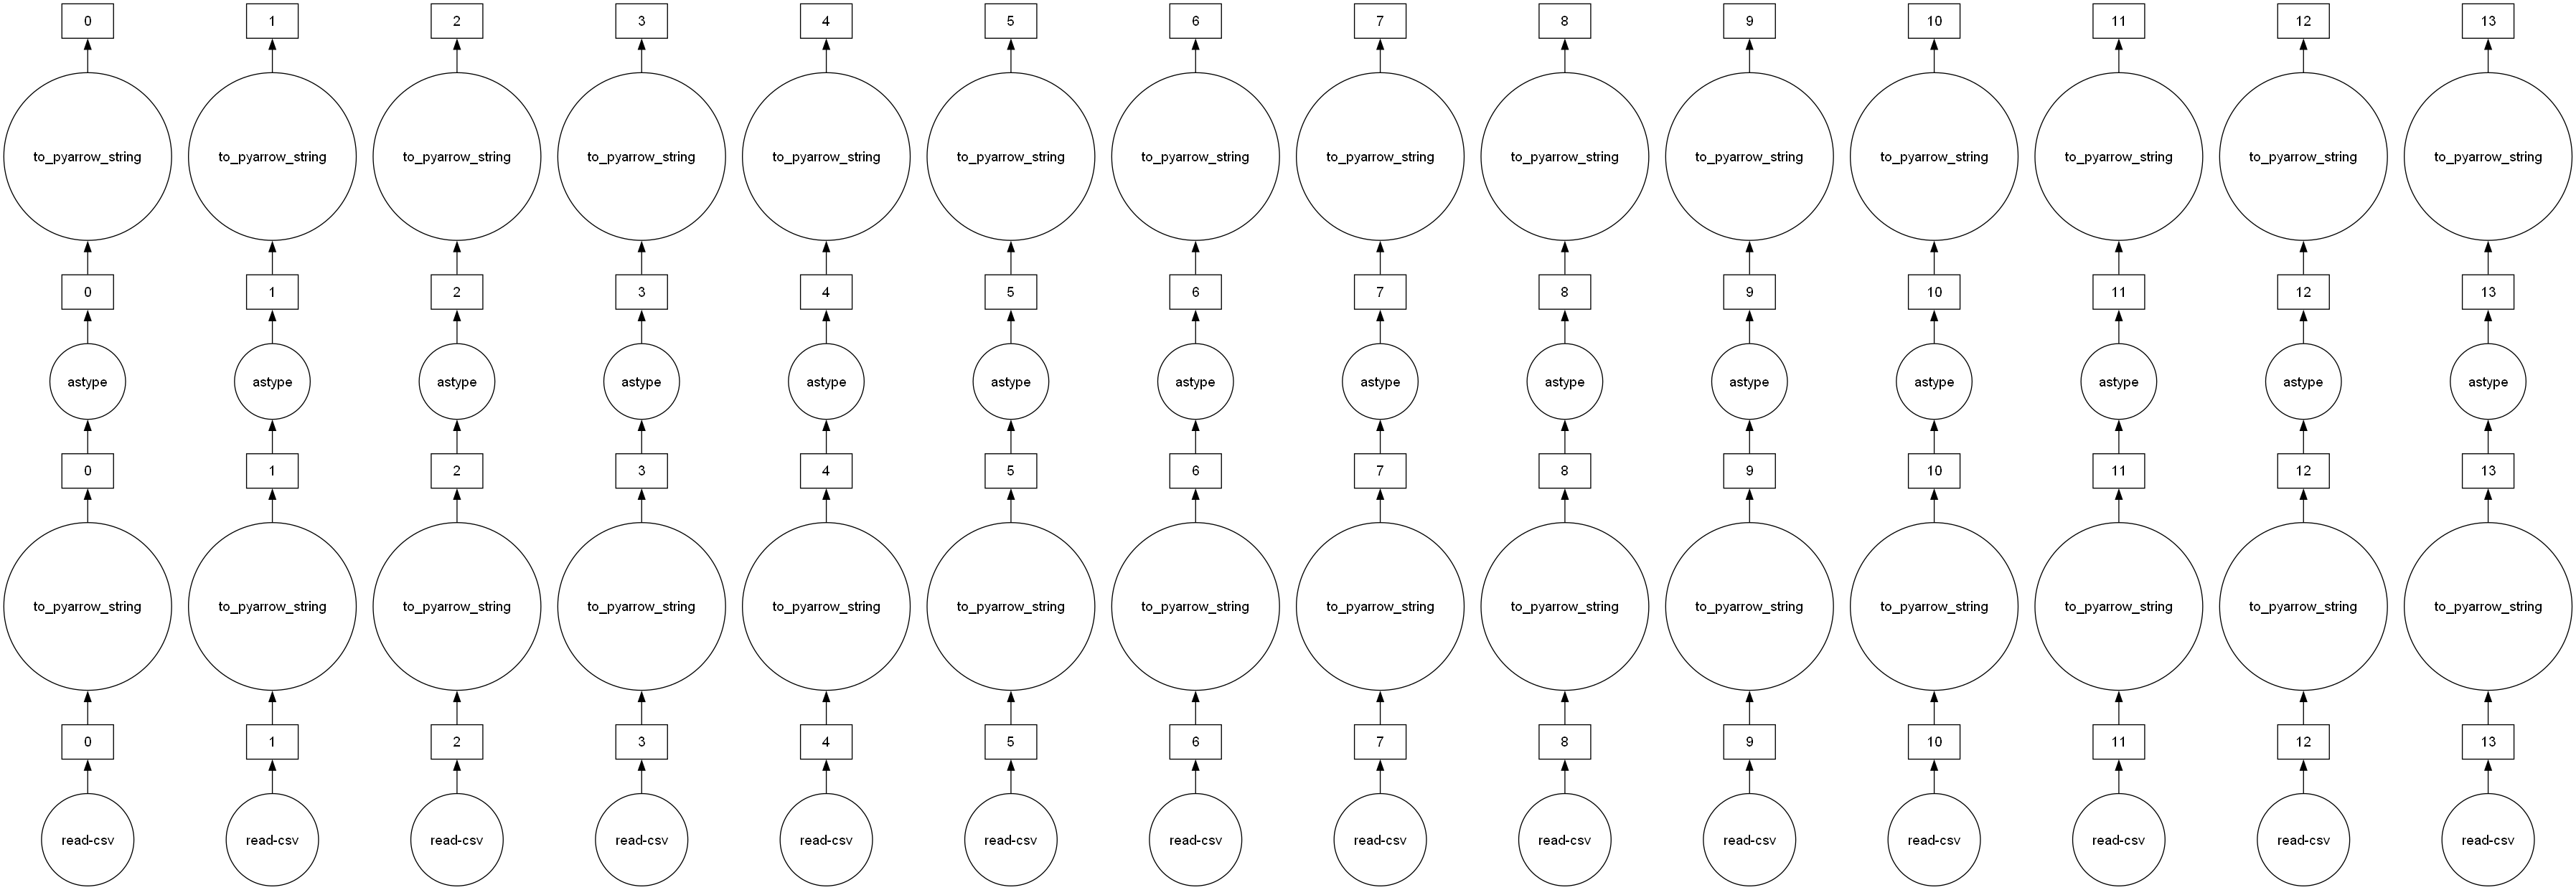

In [5]:
ddf.visualize()

In [6]:
len(ddf)

10551220

In [7]:
ddf.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"


In [8]:
ddf=ddf.loc[(ddf['titleType']=='movie')]
len(ddf)

671355

In [9]:
min_start=ddf.startYear.min()
min_start.compute()

'1894'

In [10]:
ddf = ddf.loc[(ddf['isAdult'] == '0') | (ddf['isAdult'] == '1')]
len(ddf)

671355

In [11]:
import re
ddf=ddf.map_partitions(lambda partition: partition[partition['startYear'].str.match(r'^\d+$')])
len(ddf)


574530

In [12]:
ddf=ddf.map_partitions(lambda partition: partition[partition['runtimeMinutes'].str.match(r'^\d+$')])
len(ddf)

414904

In [14]:
single_df=ddf.compute()
single_df.to_csv('clean_basics',sep='\t',index=False)